# Introduction

This notebook leverages pre-defined functions from the `train_random_forest.py` script to train an random forest model on the Sentiment140 dataset using Bag of Words features.

### Setup    

In [1]:
import sys
import os
sys.path.append('../../src/models/')  # Add the path to the script

In [2]:
from train_random_forest import (
    load_bow_features, prepare_features_and_labels, 
    train_random_forest, evaluate_model, save_model
)

from sklearn.model_selection import train_test_split

### Ensure the directory for figures exists

In [3]:
# Ensure the directory exists
output_dir = os.path.join('..', '..', 'reports', 'figures', 'models')
os.makedirs(output_dir, exist_ok=True)

### Load the cleaned data

In [4]:
import pandas as pd

def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

# Use the load_data function to load your data
df = load_data('../../data/processed/cleaned_data.csv')
df = df.dropna(subset=['clean_text'])

### Feature Engineering: Load BoW Features

In [5]:
bow_df, vectorizer = load_bow_features('../../src/features/Bow.pkl', '../../models/Bow_model.pkl')

### Prepare Features and Labels

In [6]:
# Prepare the features (X) and labels (y) for training
X, y = prepare_features_and_labels(bow_df)

### Train the Random Forest Model

In [7]:
# Train the Random Forest model using the prepared features and labels
model = train_random_forest(X, y, n_estimators=75, max_depth=30, max_features='sqrt', max_samples=0.9)

### Evaluate the Model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accuracy, report, conf_matrix = evaluate_model(model, X_test, y_test)
print(f"Model Accuracy on Test Dataset: {round(accuracy, 2)}")
print("\nClassification Report:\n", report)

Model Accuracy on Test Dataset: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.57      0.66    158761
           1       0.67      0.85      0.75    159633

    accuracy                           0.71    318394
   macro avg       0.73      0.71      0.71    318394
weighted avg       0.73      0.71      0.71    318394



### Visualization: Confusion Matrix

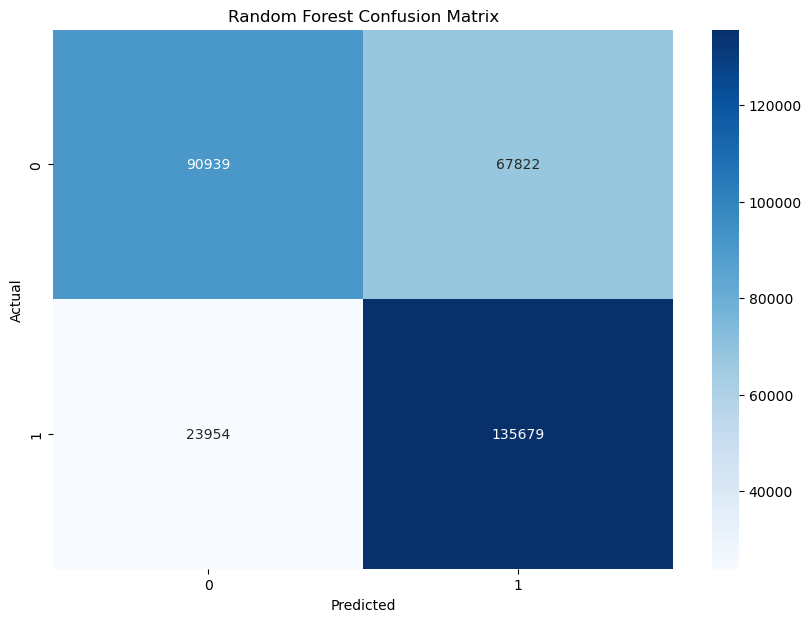

Saving the plot to ..\..\reports\figures\models\rand_frst_conf_mtx.png


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Save confusion matrix as image
save_path = os.path.join(output_dir, 'rand_frst_conf_mtx.png')
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()
plt.close()
print(f"Saving the plot to {save_path}")

### Save the Model

In [11]:
model_path = '../../models/random_forest_model.pkl'

# Check if the file already exists
if os.path.exists(model_path):
    print(f"File {model_path} already exists. The model will not be overwritten.")
else:
    save_model(model, model_path)
    print(f"Model saved to {model_path}")

# Code to overwrite the model if needed (Uncomment the following lines to overwrite)
# save_model(model, model_path)
# print(f"Model overwritten at {model_path}")

File ../../models/random_forest_model.pkl already exists. The model will not be overwritten.
